<a href="https://colab.research.google.com/github/ArrogantNobody/Pytorch_study/blob/main/pytorch_foundation_data_batch_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference： https://zhuanlan.zhihu.com/p/115363495

In [3]:
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
tensor([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])


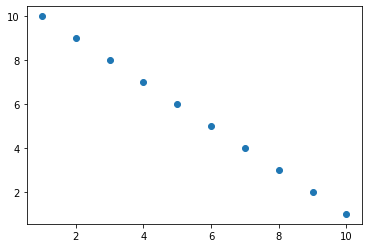

In [6]:
BATCH_SIZE = 5

x = torch.linspace(1,10,step = 10)#step number
print(x)
y = torch.linspace(10,1,10)
print(y)
plt.scatter(x,y)
plt.show()

classtorch.utils.data.Dataset表示Dataset的抽象类。[1]
所有其他数据集都应该进行子类化。所有子类应该override__len__和__getitem__，前者提供了数据集的大小，后者支持整数索引，范围从0到len(self)。

class torch.utils.data.TensorDataset(data_tensor, target_tensor)

包装数据和目标张量的数据集。

通过沿着第一个维度索引两个张量来恢复每个样本。

参数：

data_tensor (Tensor) －　包含样本数据
target_tensor (Tensor) －　包含样本目标（标签）


classtorch.utils.data.DataLoader数据加载器。组合数据集和采样器，并在数据集上提供单进程或多进程迭代器。[2]
参数：

dataset (Dataset) – 加载数据的数据集。
batch_size (int, optional) – 每个batch加载多少个样本(默认: 1)。
shuffle (bool, optional) – 设置为True时会在每个epoch重新打乱数据(默认: False).
sampler (Sampler, optional) – 定义从数据集中提取样本的策略。如果指定，则忽略shuffle参数。
num_workers (int, optional) – 用多少个子进程加载数据。0表示数据将在主进程中加载(默认: 0)
collate_fn (callable, optional) –
pin_memory (bool, optional) –
drop_last (bool, optional) – 如果数据集大小不能被batch size整除，则设置为True后可删除最后一个不完整的batch。如果设为False并且数据集的大小不能被batch size整除，则最后一个batch将更小。(默认: False)

In [7]:
torch_dataset = Data.TensorDataset(x , y )
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
    )

In [8]:
for epoch in range(3):
    for step ,(batch_x,batch_y) in enumerate(loader):
        print('Epoch:',epoch,'| step:',step,'|batch_x:',batch_x.numpy(),'|batch_y：',batch_y.numpy())

Epoch: 0 | step: 0 |batch_x: [6. 9. 4. 3. 1.] |batch_y： [ 5.  2.  7.  8. 10.]
Epoch: 0 | step: 1 |batch_x: [ 7. 10.  8.  2.  5.] |batch_y： [4. 1. 3. 9. 6.]
Epoch: 1 | step: 0 |batch_x: [5. 9. 4. 1. 2.] |batch_y： [ 6.  2.  7. 10.  9.]
Epoch: 1 | step: 1 |batch_x: [ 8. 10.  6.  7.  3.] |batch_y： [3. 1. 5. 4. 8.]
Epoch: 2 | step: 0 |batch_x: [ 6.  9.  1.  2. 10.] |batch_y： [ 5.  2. 10.  9.  1.]
Epoch: 2 | step: 1 |batch_x: [4. 7. 3. 5. 8.] |batch_y： [7. 4. 8. 6. 3.]
